                                            sequence  class
0  ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...      4
1  ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...      4
2  ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...      3
3  ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...      3
4  ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...      3
+-----------------------------+--------+-------------+
|         Gene Family         | Number | Class label |
+-----------------------------+--------+-------------+
| G protein coupled receptors |  531   |      0      |
|       Tyrosine kinase       |  534   |      1      |
|     Tyrosine phosphatase    |  349   |      2      |
|          Synthetase         |  672   |      3      |
|           Synthase          |  711   |      4      |
|         Ion channel         |  240   |      5      |
|     Transcription factor    |  1343  |      6      |
+-----------------------------+--------+-------------+
   class                           

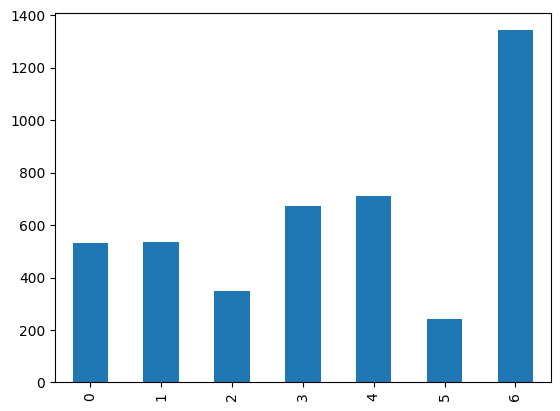

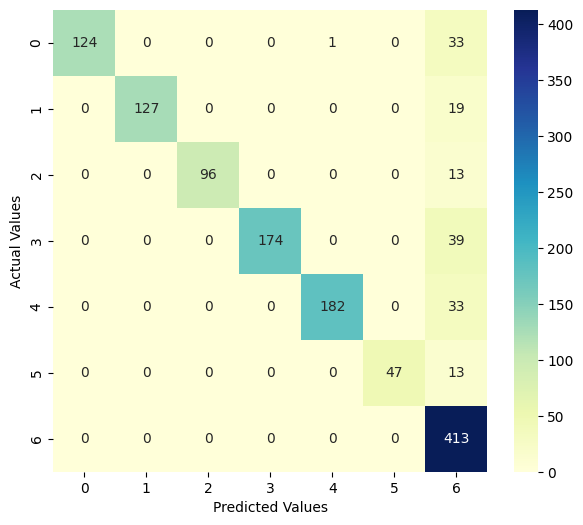

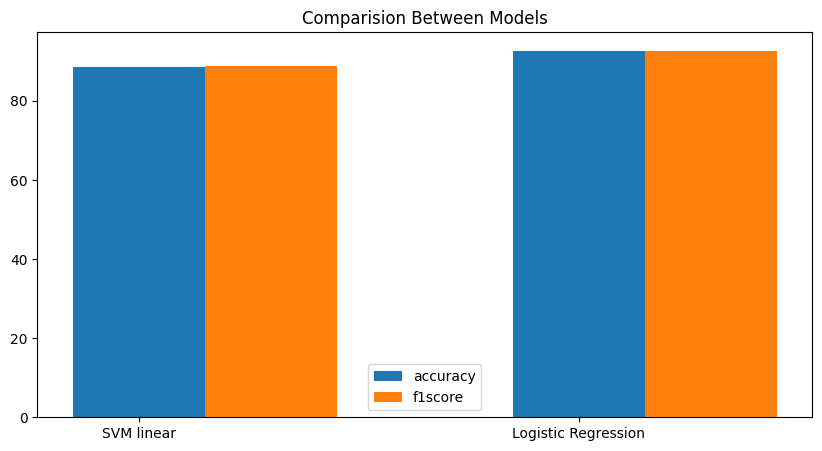

Confusion Matrix


<Axes: xlabel='Predicted', ylabel='Actual'>

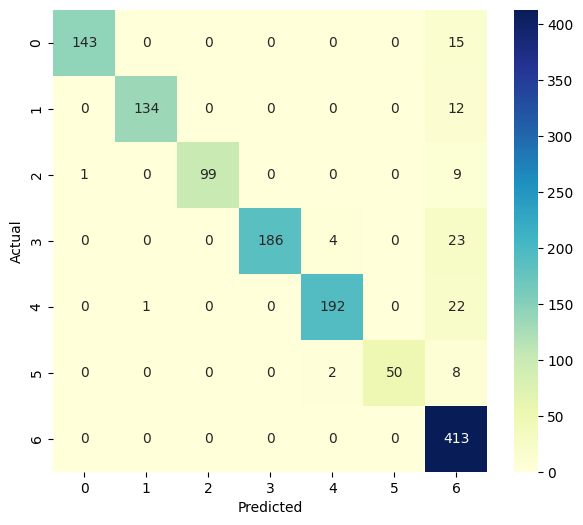

In [5]:
import sys
import numpy
import sklearn
import pandas
import numpy as npp
import pandas as pdd
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.linear_model import LogisticRegression
import seaborn as sns

path = '/content/human.txt'
data_human = pdd.read_table(path)
data_human["sequence"][10]
print(data_human.head())
from prettytable import PrettyTable
Table = PrettyTable(["Gene Family", "Number", "Class label"])
Table.add_row(["G protein coupled receptors", "531", "0"])
Table.add_row(["Tyrosine kinase", "534", "1"])
Table.add_row(["Tyrosine phosphatase", "349", "2"])
Table.add_row(["Synthetase", "672", "3"])
Table.add_row(["Synthase", "711", "4"])
Table.add_row(["Ion channel", "240", "5"])
Table.add_row(["Transcription factor", "1343", "6"])
print(Table)

def get_Kmers(sequence, size=6):    
   return [sequence[p:p+size].lower() for p in range(len(sequence) - size + 1)]
    
data_human['hexamers'] =data_human.apply(lambda p: get_Kmers(p['sequence']), axis=1)
data_human =data_human.drop('sequence', axis=1)
print(data_human[1:7])
human_list = data_human["hexamers"].values.tolist()
#print(human_list[1])
for i in range(len(human_list)):
  separator = ' '
  human_list[i] = separator.join(human_list[i])
#print(human_list[1])
class_data = data_human.iloc[:,0].values
print(class_data.shape)
from sklearn.feature_extraction.text import CountVectorizer 
vectorizer = CountVectorizer(ngram_range=(4,4))
X_human = vectorizer.fit_transform(human_list)
data_human['class'].value_counts().sort_index().plot.bar()
from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test = train_test_split(X_human, class_data, test_size = 0.30, random_state=50)  
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,f1_score, precision_score, recall_score

cls = SVC(C=100).fit(X_Train, y_Train)
y_Predict = cls.predict(X_Test)

import pickle
print("Confusion Matrix")
plt.figure(figsize=(7,6))
sns.heatmap(pdd.crosstab(pdd.Series(y_Test, name='Actual Values'), pdd.Series(y_Predict, name='Predicted Values')),cmap="YlGnBu",annot=True,fmt='d')
def get_values(y_Test, y_Predicted):
    Recall = recall_score(y_Test, y_Predicted, average='weighted')
    Precision = precision_score(y_Test, y_Predicted, average='weighted')
    Accuracy = accuracy_score(y_Test, y_Predicted)
    F1_score = f1_score(y_Test, y_Predicted, average='weighted')
    return Accuracy, Precision, Recall, F1_score
Accuracy, Precision, Recall, F1_score = get_values(y_Test, y_Predict)
print("accuracy_SVM = %.4f \nprecision_SVM = %.4f \nrecall_SVM = %.4f \nf1 = %.4f" % (Accuracy, Precision, Recall, F1_score))
print(classification_report(y_Test, y_Predict))

lg = LogisticRegression(random_state= 0)
lg.fit(X_Train,y_Train)
y_pred = lg.predict(X_Test)

def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_Test, y_pred)
print("accuracy_svm = %.3f \nprecision_svm = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))
print(classification_report(y_Test, y_pred))

plt.figure(figsize=(10,5))
scores=["SVM linear","Logistic Regression"]
accscore=[88.59,92.7]
f1score=[88.8,92.6]
w=0.3
bar1=npp.arange(len(scores))
bar2=[i+w for i in bar1]

plt.bar(bar1,accscore,w,label="accuracy")
plt.bar(bar2,f1score,w,label="f1score")
plt.xticks(bar1, scores)
plt.legend()
plt.title("Comparision Between Models")
plt.show()

import pickle
print("Confusion Matrix")
plt.figure(figsize=(7,6))
sns.heatmap(pdd.crosstab(pdd.Series(y_Test, name='Actual'), pdd.Series(y_pred, name='Predicted')),cmap="YlGnBu",annot=True,fmt='d')